In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns 

### Load Data set 

In [2]:
df=pd.read_excel('customer_churn_large_dataset.xlsx')

In [3]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


# Data Preprocessing

In [4]:
df.shape

(100000, 9)

In [5]:
df.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [6]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


**Here we can see that 75% people who are not likely to churn are :
People who are younger than age 57
Use lesser than 387 GB
Has subscription for less than 19 months
Monthly bill less than 82.64 units

**The remaining 25% people who are most likely to churn are :¶
People who are older than age 57
Use more than 387 GB
Has subscription for more than 19 months
Monthly bill more than 82.64 units

# EDA

## Univariate Analysis

C:\Users\afifa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '50221'), Text(0, 0, '49779')]

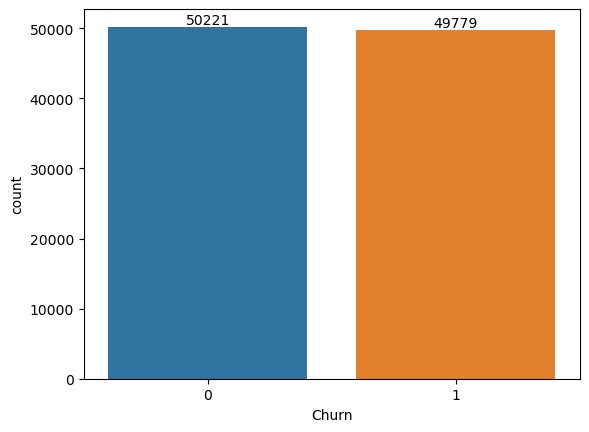

In [7]:
 ax=sns.countplot(df["Churn"])
ax.bar_label(ax.containers[0])

C:\Users\afifa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '20041'),
 Text(0, 0, '19813'),
 Text(0, 0, '20031'),
 Text(0, 0, '19958'),
 Text(0, 0, '20157')]

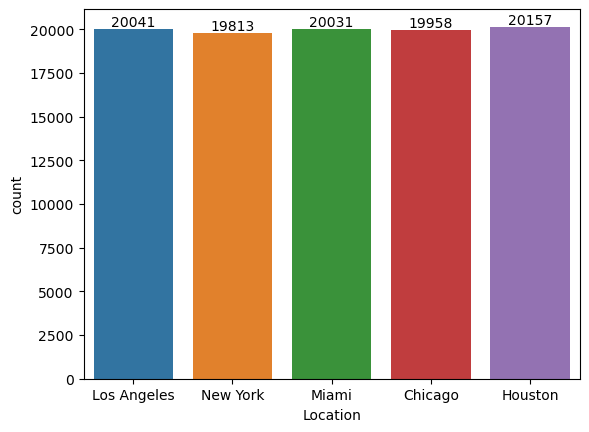

In [8]:
 ax=sns.countplot(df["Location"])
ax.bar_label(ax.containers[0])

**This means that the dataset has a nearly balanced distribution between the two classes, making it suitable for building predictive models without a significant class imbalance.

C:\Users\afifa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '49784'), Text(0, 0, '50216')]

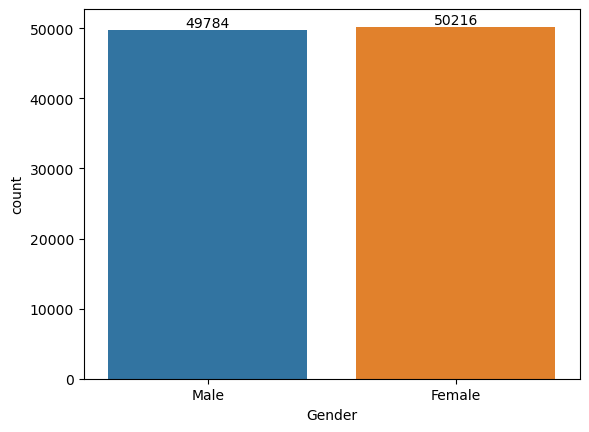

In [9]:
ax=sns.countplot(df["Gender"])
ax.bar_label(ax.containers[0])

 **There is not much difference between the male and female customer as Female is slightly more than male.

<AxesSubplot:ylabel='Gender'>

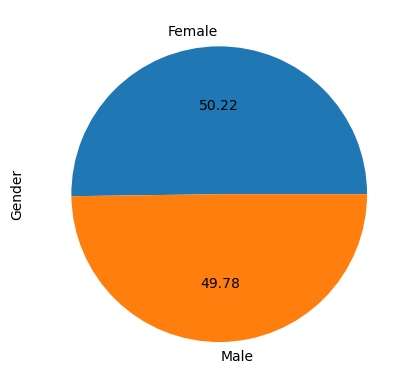

In [10]:
df["Gender"].value_counts().plot(kind="pie",autopct="%.2f")

**There is not much difference between the male and female customer as Female is slightly more than male like only 0.44%.

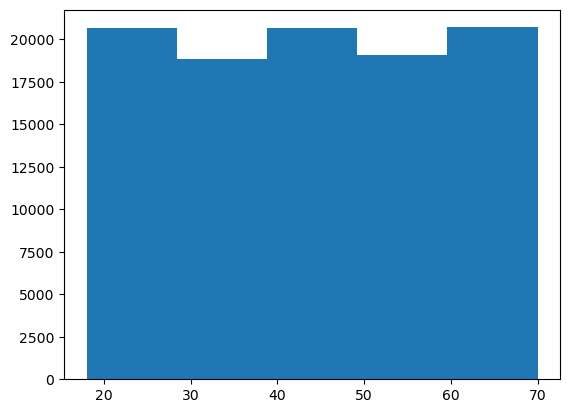

In [11]:
##creating histograms to understand the distribution
ax=plt.hist(df["Age"] ,bins=5)

Text(0.5, 1.0, 'Subscription_Length_Months')

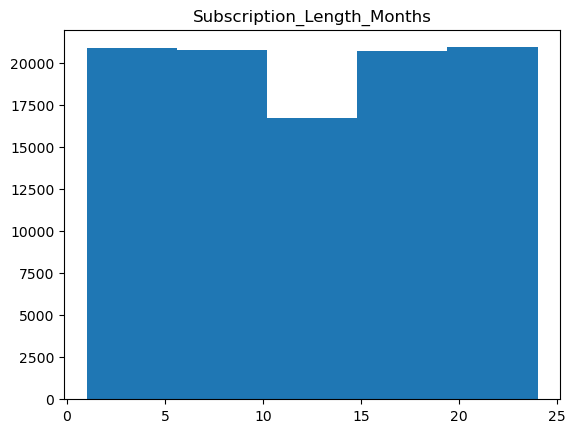

In [12]:
ax=plt.hist(df["Subscription_Length_Months"] ,bins=5)
plt.title("Subscription_Length_Months")

C:\Users\afifa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

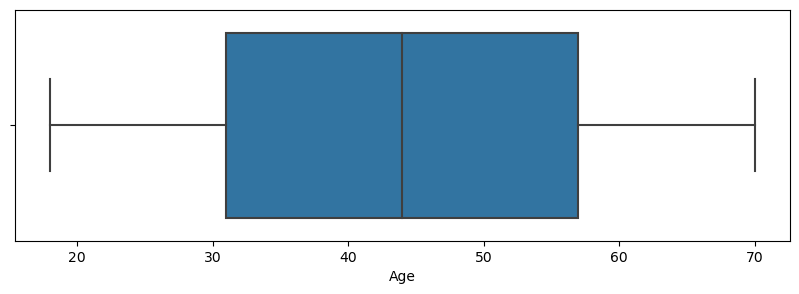

In [13]:
plt.figure(figsize=(10,3))
sns.boxplot(df["Age"])

**The boxplot indicates that most people fall between the ages of 34 and 57 (median). There are some older individuals aged 60-70 (maximum) and younger individuals aged 20-30 (minimum) in the dataset.



Text(0.5, 1.0, 'Relashionship with target variable')

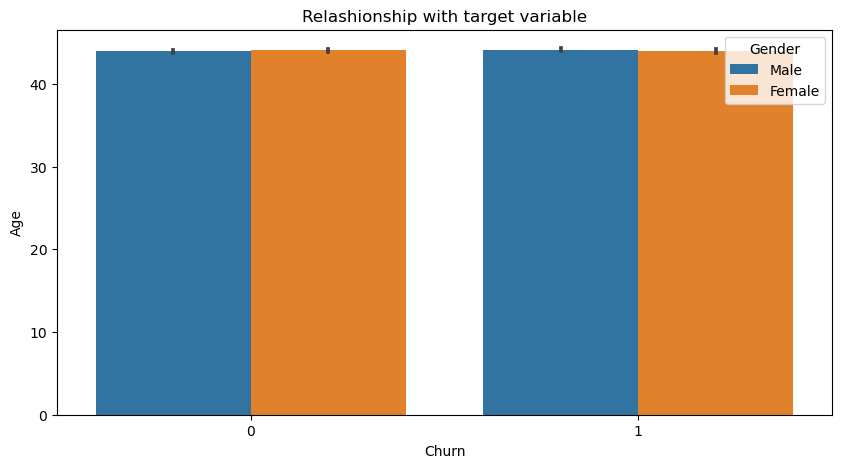

In [14]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=df["Churn"],y=df["Age"],hue=df["Gender"])
ax.set_title("Relashionship with target variable")

**Here we can see that the Female cutomers from Los Angeles and Male customers from Houston has got churned the least

# Data Cleaning

### Is there any Missing Values?

In [15]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

**There is no Missing Value in the Dataset

### Is there any Duplicate Value?

In [16]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

**There is no duplicate value is present in the dataset.

In [17]:
df.drop(['CustomerID','Name'],axis=1,inplace=True)

In [18]:
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1


### Build a corelation of all predictors with 'Churn

<AxesSubplot:>

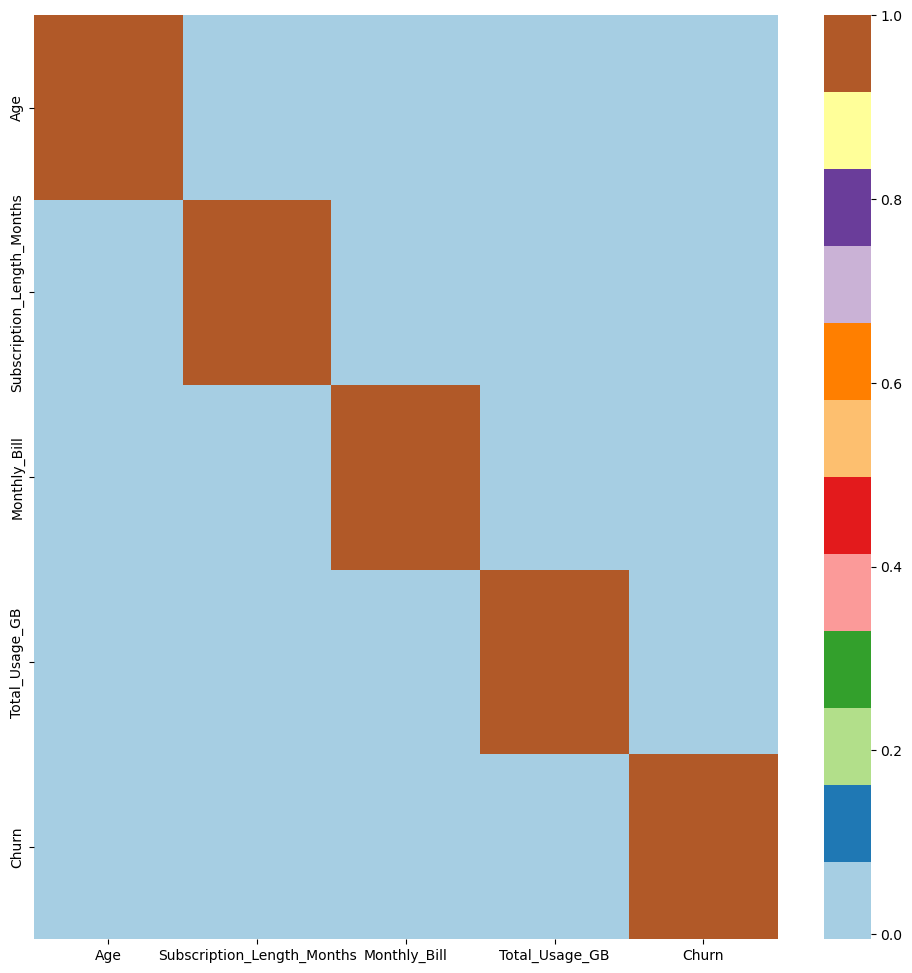

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Paired")

**Here we don't see any special correlation among the parameters

# Scaling

In [21]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[["Gender"]]=oe.fit_transform(df[["Gender"]])

In [26]:
# Create new feature: Usage_per_Month
df['Usage_per_Month'] = df['Total_Usage_GB'] / df['Subscription_Length_Months']

In [27]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Monthly_Bill', 'Total_Usage_GB', 'Subscription_Length_Months', 'Usage_per_Month']] = scaler.fit_transform(
    df[['Monthly_Bill', 'Total_Usage_GB', 'Subscription_Length_Months', 'Usage_per_Month']])

In [28]:
df.Location.unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [30]:
df["Location"].replace(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],[1,4,3,2,0], inplace=True)

In [31]:
Age_mean=df["Age"].mean
df ["Age"].fillna(Age_mean,inplace=True)

In [32]:
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Usage_per_Month
0,63,1.0,1,0.651115,0.410606,-0.294289,0,-0.447926
1,62,0.0,4,-1.658879,-0.805374,-0.784852,0,1.955583
2,24,0.0,1,-1.081380,1.009204,1.422681,0,0.739522
3,36,0.0,3,-1.370129,1.625597,0.173279,1,0.845928
4,46,0.0,3,0.939864,-0.341720,-0.064338,0,-0.446138
...,...,...,...,...,...,...,...,...
99995,33,1.0,0,1.517363,-0.490504,-0.370939,1,-0.509584
99996,62,0.0,4,0.939864,-0.168220,0.587191,0,-0.378134
99997,64,1.0,2,0.651115,1.535140,-0.179313,1,-0.434514
99998,51,0.0,4,1.084239,-0.781153,1.223390,1,-0.329092


# Dividing Dataset in Dependent and Independent Data Table

In [33]:
x=df.drop(columns=["Churn"],axis=1)
y=df.iloc[:,-2].values

In [35]:
x

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Usage_per_Month
0,63,1.0,1,0.651115,0.410606,-0.294289,-0.447926
1,62,0.0,4,-1.658879,-0.805374,-0.784852,1.955583
2,24,0.0,1,-1.081380,1.009204,1.422681,0.739522
3,36,0.0,3,-1.370129,1.625597,0.173279,0.845928
4,46,0.0,3,0.939864,-0.341720,-0.064338,-0.446138
...,...,...,...,...,...,...,...
99995,33,1.0,0,1.517363,-0.490504,-0.370939,-0.509584
99996,62,0.0,4,0.939864,-0.168220,0.587191,-0.378134
99997,64,1.0,2,0.651115,1.535140,-0.179313,-0.434514
99998,51,0.0,4,1.084239,-0.781153,1.223390,-0.329092


In [36]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Train Test Split

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [49]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

(67000, 7)
(67000,)
(33000, 7)
(33000,)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [62]:
def train_model(m,name):
    model = m
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(f"\n{name}")
    print(classification_report(y_test, predictions))

In [63]:

from sklearn.metrics import mean_absolute_error,r2_score,classification_report,confusion_matrix

In [ ]:
train_model(DecisionTreeClassifier(),"Decision Tree Classifier")
train_model(RandomForestClassifier(random_state=3),"Random Forest Classifier")         
train_model(LogisticRegression(),"Logistic Regression")
train_model(SVC(),"Support vector Classifier")


Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     16615
           1       0.49      0.50      0.50     16385

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.50     33000
weighted avg       0.50      0.50      0.50     33000


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.50      0.52      0.51     16615
           1       0.49      0.47      0.48     16385

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.50     33000
weighted avg       0.50      0.50      0.50     33000


Logistic Regression
              precision    recall  f1-score   support

           0       0.51      0.58      0.54     16615
           1       0.50      0.42      0.46     16385

    accuracy                           0.50     33000
   macro avg       0.50      0.50      0.50     33000
w

In [ ]:
from imblearn.combine import SMOTEENN

In [66]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x_train,y_train)
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [ ]:
def train_model_Smoteenn(m,name):
    xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)
    model_dt_smote = m
    model_dt_smote.fit(xr_train,yr_train)
    yr_predict = model_dt_smote.predict(xr_test)
    model_score_r = model_dt_smote.score(xr_test, yr_test)
    print(name)
    print(classification_report(yr_test, yr_predict))

In [ ]:
train_model_Smoteenn(DecisionTreeClassifier(),"Decision Tree Classifier")
train_model_Smoteenn(RandomForestClassifier(random_state=3),"Random Forest Classifier")      
train_model_Smoteenn(LogisticRegression(),"Logistic Regression")